In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn

data_xvals = np.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )[0]
data_yvals = np.sin( data_xvals )


def Klin(x, y, noise):
    n = 0
    if noise:
        n = 1 if x == y.tolist() else 0
    return x*y + n*.1

def Kpoly(x,y, noise):
    n = 0
    if noise:
         n = 1 if x == y.tolist() else 0
    return (1+(x*y))**3 + n*.1

def Kiso(x,y, noise):
    n = 0
    if noise:
         n = 1 if x == y.tolist() else 0
    return np.exp(-.5*(x-y)**2) + n*.1

def calculatekmatlin(x_range, y_range ,noise):
    k = np.zeros((len(x_range),len(y_range)))
    for i in xrange(0,len(x_range)):
        for j in xrange(0,len(y_range)):
            k[i][j] = Klin(x_range[i], y_range[j], noise)
    return k

def calculatekmatiso(noise):
    k = np.identity(6)
    for i in xrange(0,6):
        for j in xrange(0,6):
            k[i][j] = Kiso(data_xvals[i], data_xvals[j],noise)
    return k

def calculatekmatpoly(noise):
    k = np.identity(6)
    for i in xrange(0,6):
        for j in xrange(0,6):
            k[i][j] = Kpoly(data_xvals[i], data_xvals[j],noise)
    return k


#linear noiseless
xt = np.arange(-2, 10.01, .1)

upperboundlin = []
lowerboundlin = []
sigmalin = []
mulin = []
klin = calculatekmatlin(data_xvals, data_xvals, 0)
kxx = np.linalg.pinv(klin)
klintest = (xt, data_xvals, 0)
klintest.shape

print data_xvals.shape

si = 1-np.dot(Klin())


for i in xrange(0,len(xt)):
    xtest = [j*xt[i] for j in data_xvals]
    si = 1-np.dot(Klin(xtest,data_xvals,0),np.dot(kxx,np.transpose(Klin(xtest,data_xvals,0))))
    u =  np.dot(Klin(xtest,data_xvals,0),(np.dot(kxx,(data_yvals))))
    upperboundlin.append(u+si)
    lowerboundlin.append(u-si)
    sigmalin.append(si)
    mulin.append(u)
       
#linear noisy        
upperboundlinn = []
lowerboundlinn = []
sigmalinn = []
mulinn = []
klinn = calculatekmatlin(1)
kxx = np.linalg.pinv(klinn)



for i in xrange(0,len(xt)):
    xtest = [j*xt[i] for j in data_xvals]
    si = 1-np.dot(Klin(xtest,data_xvals,1),np.dot(kxx,np.transpose(Klin(xtest,data_xvals,1))))
    u =  np.dot(Klin(xtest,data_xvals,1),(np.dot(kxx,(data_yvals))))
    upperboundlinn.append(u+si)
    lowerboundlinn.append(u-si)
    sigmalinn.append(si)
    mulinn.append(u)
       
#isotropic noiseless
upperboundiso = []
lowerboundiso = []
sigmaiso = []
muiso = []
kiso = calculatekmatiso(0)
kxx = np.linalg.pinv(kiso)

for i in xrange(0,len(xt)):
    xtest = [j*xt[i] for j in data_xvals]
    si = 1-np.dot(Kiso(xtest,data_xvals,0),np.dot(kxx,np.transpose(Kiso(xtest,data_xvals,0))))
    u =  np.dot(Kiso(xtest,data_xvals,0),(np.dot(kxx,(data_yvals))))
    upperboundiso.append(u+si)
    lowerboundiso.append(u-si)
    sigmaiso.append(si)
    muiso.append(u)

#isotropic noisy
upperboundison = []
lowerboundison = []
sigmaison = []
muison = []
kison = calculatekmatiso(1)
kxx = np.linalg.pinv(kison)

for i in xrange(0,len(xt)):
    xtest = [j*xt[i] for j in data_xvals]
    si = 1-np.dot(Kiso(xtest,data_xvals,1),np.dot(kxx,np.transpose(Kiso(xtest,data_xvals,1))))
    u =  np.dot(Kiso(xtest,data_xvals,1),(np.dot(kxx,(data_yvals))))
    upperboundison.append(u+si)
    lowerboundison.append(u-si)
    sigmaison.append(si)
    muison.append(u)
        
        
#polynomial noiseless
upperboundpoly = []
lowerboundpoly = []
sigmapoly = []
mupoly = []
kpoly = calculatekmatpoly(0)
kxx = np.linalg.pinv(kpoly)

for i in xrange(0,len(xt)):
    xtest = [j*xt[i] for j in data_xvals]
    si = 1-np.dot(Kpoly(xtest,data_xvals,0),np.dot(kxx,np.transpose(Kpoly(xtest,data_xvals,0))))
    u =  np.dot(Kpoly(xtest,data_xvals,0),(np.dot(kxx,(data_yvals))))
    upperboundpoly.append(u+si)
    lowerboundpoly.append(u-si)
    sigmapoly.append(si)
    mupoly.append(u)
        
        
#polynomial noisy
upperboundpolyn = []
lowerboundpolyn = []
sigmapolyn = []
mupolyn = []
kpolyn = calculatekmatpoly(1)
kxx = np.linalg.pinv(kpolyn)

for i in xrange(0,len(xt)):
    xtest = [j*xt[i] for j in data_xvals]
    si = 1-np.dot(Kpoly(xtest,data_xvals,1),np.dot(kxx,np.transpose(Kpoly(xtest,data_xvals,1))))
    u =  np.dot(Kpoly(xtest,data_xvals,1),(np.dot(kxx,(data_yvals))))
    upperboundpolyn.append(u+si)
    lowerboundpolyn.append(u-si)
    sigmapolyn.append(si)
    mupolyn.append(u)
        

#plt.gca().fill_between()
#plt.scatter
#np.eye

#.49, .46, .99, .56 for the color 
#interpolate = True
#marker = "o"


AttributeError: 'tuple' object has no attribute 'shape'

In [59]:
def Plot(x_predict, mean, sigma, data_xvals, data_yvals, title):
    x_predict.shape
    a = np.reshape(x_predict, (1,121))
    b = np.reshape(mean,(1,121))
    c = np.reshape(sigma, (1, 121))
    
    plt.figure()
    plt.scatter(data_xvals, data_yvals, s=15)
    #plt.plot(a[0], b[0],label='mean')
    
    a = np.reshape(x_predict, (121,1))
    b = np.reshape(mean,(121,1))
    c = np.reshape(sigma, (121, 1))

    
    plt.fill(np.concatenate([a, a[::-1]]),
         np.concatenate([b - c,
                        (b + c)[::-1]]),
         alpha=.3, fc='b', ec='None', label='variance')
    
    plt.grid(True, color = "gray")
    plt.title(title)
    plt.legend(loc='upper left',frameon=False)
    for i in xrange(0,len(data_xvals)):
        plt.plot(data_xvals[i], data_yvals[i], s = 20)
    
    plt.show()


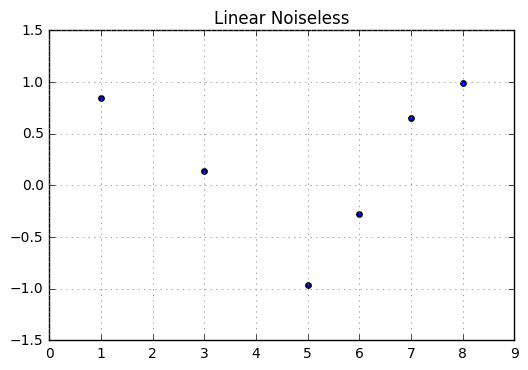

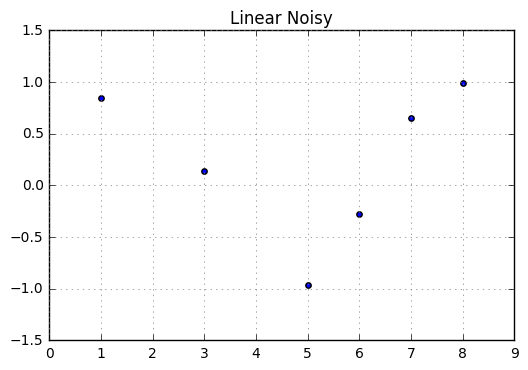

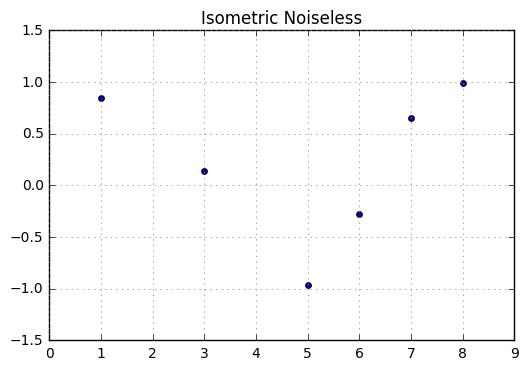

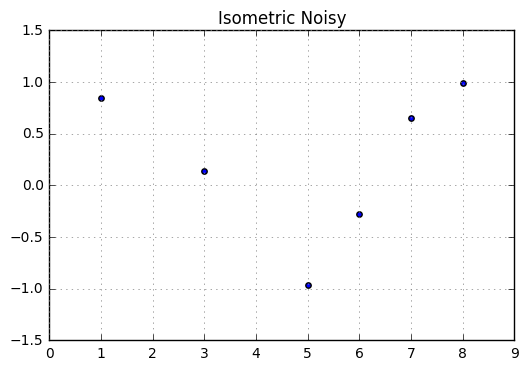

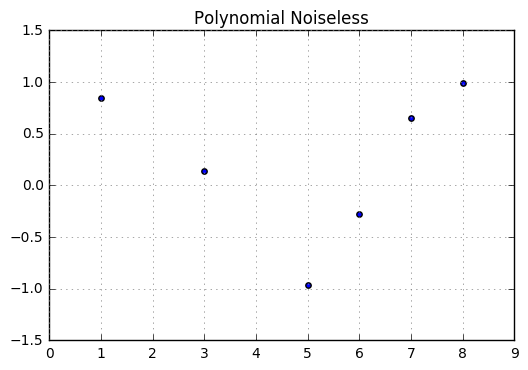

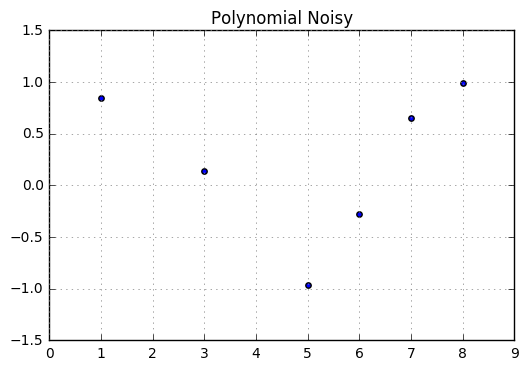

In [60]:
Plot(xt, mulin, sigmalin, data_xvals, data_yvals, "Linear Noiseless")
Plot(xt, mulinn, sigmalinn, data_xvals, data_yvals, "Linear Noisy")
Plot(xt, muiso, sigmaiso, data_xvals, data_yvals, "Isometric Noiseless")
Plot(xt, muison, sigmaison, data_xvals, data_yvals, "Isometric Noisy")
Plot(xt, mupoly, sigmapoly, data_xvals, data_yvals, "Polynomial Noiseless")
Plot(xt, mupolyn, sigmapolyn, data_xvals, data_yvals, "Polynomial Noisy")